In [128]:
import pandas as pd
import numpy as np
from pandas import datetime
from matplotlib import pyplot as plt
import os
import calendar
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

import math
from sklearn.metrics import mean_squared_error

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [74]:
for num in range(0,2):
    df = pd.read_csv("halfhourly_dataset/halfhourly_dataset/block_"+str(num)+".csv")
    df = df[['tstp','LCLid','energy(kWh/hh)']]
    df.reset_index()
    df.to_csv("hc_"+str(num)+".csv")

fout= open("energy.csv","a")
# first file:
for line in open("hc_0.csv"):
    fout.write(line)
# now the rest:    
for num in range(0,2):
    f = open("hc_"+str(num)+".csv")
    f.readline() # skip the header
    for line in f:
         fout.write(line)
    f.close()
fout.close()

In [80]:
energy = pd.read_csv('energy.csv')
np.where(pd.isna(energy['energy(kWh/hh)']))

(array([], dtype=int64),)

In [84]:
housecount = energy.groupby('tstp')[['LCLid']].nunique()
housecount.sample(n=5)
len(housecount)

39340

<AxesSubplot:xlabel='tstp'>

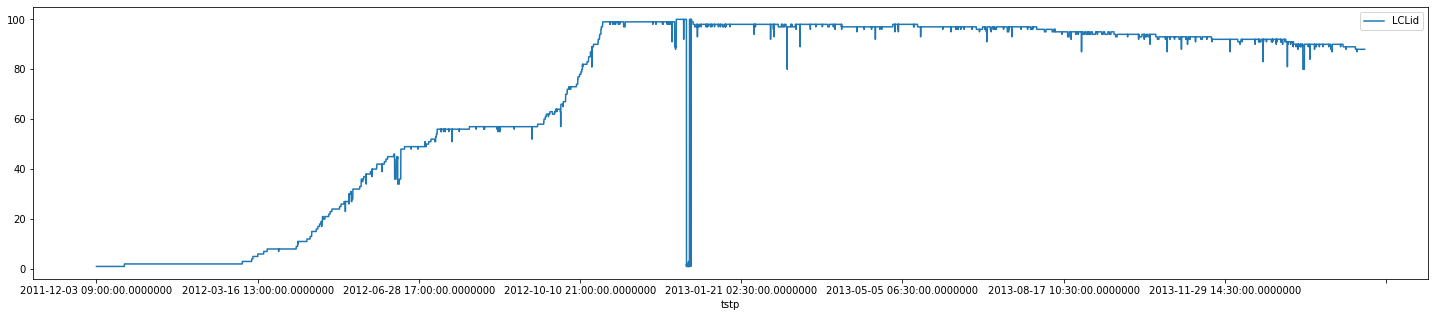

In [86]:
housecount.plot(figsize=(25,5))

In [88]:
energy = energy.groupby('tstp')[['energy(kWh/hh)']].sum()
energy = energy.merge(housecount, on = ['tstp'])
energy = energy.reset_index()

In [92]:

for i in range(len(energy['energy(kWh/hh)'])):
    energy['energy(kWh/hh)'][i] = energy['energy(kWh/hh)'][i].strip()
    energy['energy(kWh/hh)'][i] = energy['energy(kWh/hh)'][i].replace("Null", "0")
    energy['energy(kWh/hh)'][i] = energy['energy(kWh/hh)'][i].split()
    energy['energy(kWh/hh)'][i] = list(dict.fromkeys(energy['energy(kWh/hh)'][i]))
energy['energy(kWh/hh)']


C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\anaconda3\l

0                                                  [0.149]
1                                                  [0.154]
2                                                  [0.768]
3                                                  [1.179]
4                                                  [0.588]
                               ...                        
39335    [0.416, 2.4360001, 0.427, 0.163, 0.045, 0.382,...
39336    [1.35, 1.12, 1.643, 0.407, 0.134, 0.285, 0.376...
39337    [1.247, 0.701, 0.362, 0.083, 0.167, 0.728, 0.3...
39338    [1.2180001, 0.223, 0.38, 0.059, 0.021, 0.861, ...
39339    [1.387, 0.145, 0.277, 0.089, 0.039, 0.464, 0.0...
Name: energy(kWh/hh), Length: 39340, dtype: object

In [93]:
energy['energy(kWh/hh)'].fillna("0", inplace = True)
energy['energy(kWh/hh)'] = energy['energy(kWh/hh)'].apply(pd.to_numeric)

In [94]:
for i in range(len(energy['energy(kWh/hh)'])):
    energy['energy(kWh/hh)'][i] = energy['energy(kWh/hh)'][i].sum()
    

C:\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [97]:
energy.count()

tstp              39340
energy(kWh/hh)    39340
LCLid             39340
dtype: int64

In [100]:
energy['avg_energy'] =  energy['energy(kWh/hh)']/energy['LCLid']

In [ ]:
#Unused cell
for i in range(len(energy['energy(kWh/hh)'])):
    if energy['LCLid'][i] == 1:
        energy['avg_energy'][i]=energy['avg_energy'][i]/2
        energy['energy(kWh/hh)'][i]=energy['energy(kWh/hh)'][i]/2

In [102]:
pd.to_datetime(energy['tstp'])

0       2011-12-03 09:00:00
1       2011-12-03 09:30:00
2       2011-12-03 10:00:00
3       2011-12-03 10:30:00
4       2011-12-03 11:00:00
                ...        
39335   2014-02-27 22:00:00
39336   2014-02-27 22:30:00
39337   2014-02-27 23:00:00
39338   2014-02-27 23:30:00
39339   2014-02-28 00:00:00
Name: tstp, Length: 39340, dtype: datetime64[ns]

In [103]:
energy['tstp'] = energy['tstp'].astype('datetime64[s]')

In [104]:
energy

,tstp,energy(kWh/hh),LCLid,avg_energy
0,2011-12-03 09:00:00,0.149,1,0.149000
1,2011-12-03 09:30:00,0.154,1,0.154000
2,2011-12-03 10:00:00,0.768,1,0.768000
3,2011-12-03 10:30:00,1.179,1,1.179000
4,2011-12-03 11:00:00,0.588,1,0.588000
...,...,...,...,...
39335,2014-02-27 22:00:00,53.464,88,0.607545
39336,2014-02-27 22:30:00,50.437,88,0.573148
39337,2014-02-27 23:00:00,44.507,88,0.505761
39338,2014-02-27 23:30:00,34.791,88,0.395352


In [131]:
energy.loc[:,'datetime'] = pd.to_datetime(energy.loc[:,'tstp'], '%Y-%m-%d %H:%M:%S')
energy.loc[:,'date'] = energy.loc[:,'tstp'].dt.date
energy.loc[:,'month'] = energy.loc[:,'datetime'].dt.month
energy.loc[:,'day_of_month'] = energy.loc[:,'datetime'].dt.day
energy.loc[:,'time'] = energy.loc[:,'datetime'].dt.time
energy.loc[:,'weekday'] = energy.loc[:,'datetime'].dt.weekday

In [129]:
#TO FIX
energy.loc[:,'weekday'] = pd.Categorical(energy['weekday'], categories= ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday', 'Sunday'], ordered=True)
energy.loc[:,'month'] = pd.Categorical(energy['month'], categories=calendar.month_name[1:], ordered=True)

In [132]:
energy

,tstp,energy(kWh/hh),LCLid,avg_energy,datetime,date,month,day_of_month,time,weekday
0,2011-12-03 09:00:00,0.149,1,0.149000,2011-12-03 09:00:00,2011-12-03,12,3,09:00:00,5
1,2011-12-03 09:30:00,0.154,1,0.154000,2011-12-03 09:30:00,2011-12-03,12,3,09:30:00,5
2,2011-12-03 10:00:00,0.768,1,0.768000,2011-12-03 10:00:00,2011-12-03,12,3,10:00:00,5
3,2011-12-03 10:30:00,1.179,1,1.179000,2011-12-03 10:30:00,2011-12-03,12,3,10:30:00,5
4,2011-12-03 11:00:00,0.588,1,0.588000,2011-12-03 11:00:00,2011-12-03,12,3,11:00:00,5
...,...,...,...,...,...,...,...,...,...,...
39335,2014-02-27 22:00:00,53.464,88,0.607545,2014-02-27 22:00:00,2014-02-27,2,27,22:00:00,3
39336,2014-02-27 22:30:00,50.437,88,0.573148,2014-02-27 22:30:00,2014-02-27,2,27,22:30:00,3
39337,2014-02-27 23:00:00,44.507,88,0.505761,2014-02-27 23:00:00,2014-02-27,2,27,23:00:00,3
39338,2014-02-27 23:30:00,34.791,88,0.395352,2014-02-27 23:30:00,2014-02-27,2,27,23:30:00,3


# Weather info

In [170]:
weather = pd.read_csv('weather_hourly_darksky.csv')
weather.head(4)

,visibility,windBearing,temperature,time,dewPoint,pressure,apparentTemperature,windSpeed,precipType,icon,humidity,summary
0,5.97,104,10.24,2011-11-11 00:00:00,8.86,1016.76,10.24,2.77,rain,partly-cloudy-night,0.91,Partly Cloudy
1,4.88,99,9.76,2011-11-11 01:00:00,8.83,1016.63,8.24,2.95,rain,partly-cloudy-night,0.94,Partly Cloudy
2,3.70,98,9.46,2011-11-11 02:00:00,8.79,1016.36,7.76,3.17,rain,partly-cloudy-night,0.96,Partly Cloudy
3,3.12,99,9.23,2011-11-11 03:00:00,8.63,1016.28,7.44,3.25,rain,fog,0.96,Foggy


In [171]:
weather.describe()

,visibility,windBearing,temperature,dewPoint,pressure,apparentTemperature,windSpeed,humidity
count,21165.000000,21165.000000,21165.000000,21165.000000,21152.000000,21165.000000,21165.000000,21165.000000
mean,11.166485,195.685897,10.471486,6.530501,1014.125153,9.230338,3.905215,0.781829
std,3.099337,90.629453,5.781904,5.041965,11.388337,6.940919,2.026854,0.140369
min,0.180000,0.000000,-5.640000,-9.980000,975.740000,-8.880000,0.040000,0.230000
25%,10.120000,121.000000,6.470000,2.820000,1007.430000,3.900000,2.420000,0.700000
50%,12.260000,217.000000,9.930000,6.570000,1014.780000,9.360000,3.680000,0.810000
75%,13.080000,256.000000,14.310000,10.330000,1022.050000,14.320000,5.070000,0.890000
max,16.090000,359.000000,32.400000,19.880000,1043.320000,32.420000,14.800000,1.000000


In [172]:
pd.to_datetime(weather['time'])
weather = weather[['temperature', 'windBearing', 'dewPoint', 'windSpeed',
       'pressure', 'visibility', 'humidity', 'apparentTemperature','time']]
weather.rename(columns = {'time':'tstp'}, inplace = True)
weather = weather.dropna()
weather

,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature,tstp
0,10.24,104,8.86,2.77,1016.76,5.97,0.91,10.24,2011-11-11 00:00:00
1,9.76,99,8.83,2.95,1016.63,4.88,0.94,8.24,2011-11-11 01:00:00
2,9.46,98,8.79,3.17,1016.36,3.70,0.96,7.76,2011-11-11 02:00:00
3,9.23,99,8.63,3.25,1016.28,3.12,0.96,7.44,2011-11-11 03:00:00
4,9.26,111,9.21,3.70,1015.98,1.85,1.00,7.24,2011-11-11 04:00:00
...,...,...,...,...,...,...,...,...,...
21160,7.39,247,3.06,6.08,997.07,12.68,0.74,3.91,2014-02-15 19:00:00
21161,6.56,249,2.76,5.61,998.15,13.78,0.77,3.03,2014-02-15 20:00:00
21162,6.47,248,2.71,5.25,999.28,14.31,0.77,3.06,2014-02-15 21:00:00
21163,5.96,248,2.69,4.69,1000.33,14.31,0.80,2.68,2014-02-15 22:00:00


In [173]:
pd.to_datetime(weather['tstp'])
weather['tstp'] = weather['tstp'].astype('datetime64[s]')

In [194]:
weather2 = weather.copy()
weather2['tstp'] = weather2['tstp'] + pd.Timedelta(minutes = 30)
weather2

,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature,tstp
0,10.24,104,8.86,2.77,1016.76,5.97,0.91,10.24,2011-11-11 00:30:00
1,9.76,99,8.83,2.95,1016.63,4.88,0.94,8.24,2011-11-11 01:30:00
2,9.46,98,8.79,3.17,1016.36,3.70,0.96,7.76,2011-11-11 02:30:00
3,9.23,99,8.63,3.25,1016.28,3.12,0.96,7.44,2011-11-11 03:30:00
4,9.26,111,9.21,3.70,1015.98,1.85,1.00,7.24,2011-11-11 04:30:00
...,...,...,...,...,...,...,...,...,...
21160,7.39,247,3.06,6.08,997.07,12.68,0.74,3.91,2014-02-15 19:30:00
21161,6.56,249,2.76,5.61,998.15,13.78,0.77,3.03,2014-02-15 20:30:00
21162,6.47,248,2.71,5.25,999.28,14.31,0.77,3.06,2014-02-15 21:30:00
21163,5.96,248,2.69,4.69,1000.33,14.31,0.80,2.68,2014-02-15 22:30:00


In [200]:
weather = weather.append(weather2, ignore_index=True)
weather.loc[:,'datetime'] = pd.to_datetime(weather.loc[:,'tstp'], '%Y-%m-%d %H:%M:%S')
weather.loc[:,'date'] = weather.loc[:,'tstp'].dt.date
weather.loc[:,'time'] = weather.loc[:,'datetime'].dt.time
weather.sort_values(by = ['date','time'])
del weather['date']
del weather['time']
del weather['datetime']

In [263]:
weather_energy =  energy.merge(weather,on='tstp')
weather_energy

,tstp,energy(kWh/hh),LCLid,avg_energy,datetime,date,month,day_of_month,time,weekday,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature
0,2011-12-03 09:00:00,0.149,1,0.149000,2011-12-03 09:00:00,2011-12-03,12,3,09:00:00,5,11.00,262,8.84,5.99,1002.07,13.07,0.87,11.00
1,2011-12-03 09:30:00,0.154,1,0.154000,2011-12-03 09:30:00,2011-12-03,12,3,09:30:00,5,11.00,262,8.84,5.99,1002.07,13.07,0.87,11.00
2,2011-12-03 10:00:00,0.768,1,0.768000,2011-12-03 10:00:00,2011-12-03,12,3,10:00:00,5,11.42,268,7.52,6.10,1002.76,12.76,0.77,11.42
3,2011-12-03 10:30:00,1.179,1,1.179000,2011-12-03 10:30:00,2011-12-03,12,3,10:30:00,5,11.42,268,7.52,6.10,1002.76,12.76,0.77,11.42
4,2011-12-03 11:00:00,0.588,1,0.588000,2011-12-03 11:00:00,2011-12-03,12,3,11:00:00,5,11.41,274,6.39,6.20,1003.24,13.07,0.71,11.41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39216,2014-02-27 22:00:00,53.464,88,0.607545,2014-02-27 22:00:00,2014-02-27,2,27,22:00:00,3,4.10,216,1.64,3.02,1005.67,14.00,0.84,1.41
39217,2014-02-27 22:30:00,50.437,88,0.573148,2014-02-27 22:30:00,2014-02-27,2,27,22:30:00,3,4.10,216,1.64,3.02,1005.67,14.00,0.84,1.41
39218,2014-02-27 23:00:00,44.507,88,0.505761,2014-02-27 23:00:00,2014-02-27,2,27,23:00:00,3,3.93,200,1.61,2.75,1004.62,14.03,0.85,1.42
39219,2014-02-27 23:30:00,34.791,88,0.395352,2014-02-27 23:30:00,2014-02-27,2,27,23:30:00,3,3.93,200,1.61,2.75,1004.62,14.03,0.85,1.42


In [346]:
weather_energy.head(2)

,tstp,en_consum,LCLid,avg_energy,datetime,date,month,day_of_month,time,weekday,...,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature,Bank holidays,Type,holiday_ind
0,2011-12-03 09:00:00,0.149,1,0.149,2011-12-03 09:00:00,2011-12-03,12,3,09:00:00,5,...,262,8.84,5.99,1002.07,13.07,0.87,11.0,NaN,NaN,0
1,2011-12-03 09:30:00,0.154,1,0.154,2011-12-03 09:30:00,2011-12-03,12,3,09:30:00,5,...,262,8.84,5.99,1002.07,13.07,0.87,11.0,NaN,NaN,0


In [264]:
weather_energy.rename(columns = {'energy(kWh/hh)':'en_consum'}, inplace = True)

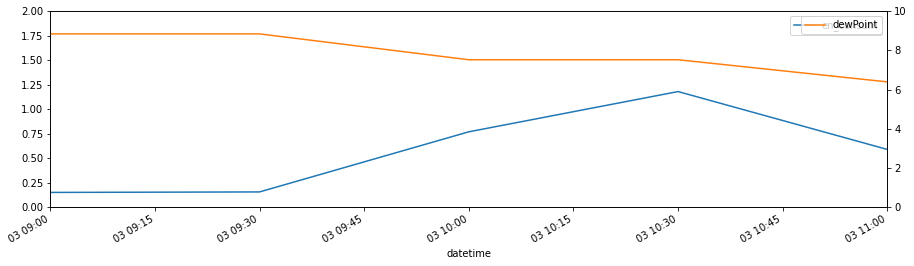

In [265]:
#FOR LATER USE!
fig, axes = plt.subplots(nrows=1, ncols=1)
weather_energy.plot(x = "datetime",y=["en_consum"], figsize=(15, 4),ylim = (0,2), xlim=('2011-12-03 09:00:00', '2011-12-03 11:00:00'), ax = axes)
axes = axes.twinx()
weather_energy.plot(x = "datetime",y=["dewPoint"], figsize=(15, 4),ylim = (0,10), xlim=('2011-12-03 09:00:00', '2011-12-03 11:00:00'), color = 'tab:orange', ax = axes)
plt.show()

In [365]:
weather_energy['avg_energy'] = pd.to_numeric(weather_energy['avg_energy'])
weather_energy['en_consum'] = pd.to_numeric(weather_energy['en_consum'])

In [366]:
weather_energy.dtypes

tstp                   datetime64[ns]
en_consum                     float64
LCLid                           int64
avg_energy                    float64
datetime               datetime64[ns]
date                           object
month                           int64
day_of_month                    int64
time                           object
weekday                         int64
temperature                   float64
windBearing                     int64
dewPoint                      float64
windSpeed                     float64
pressure                      float64
visibility                    float64
humidity                      float64
apparentTemperature           float64
Bank holidays                  object
Type                           object
holiday_ind                     int32
dtype: object

In [368]:
cor_matrix = weather_energy[['avg_energy','temperature', 'windBearing', 'dewPoint', 'windSpeed',
       'pressure', 'visibility', 'humidity', 'apparentTemperature']].corr()
cor_matrix

,avg_energy,temperature,windBearing,dewPoint,windSpeed,pressure,visibility,humidity,apparentTemperature
avg_energy,1.000000,-0.123819,-0.056876,-0.148750,0.082541,-0.201101,0.014315,-0.033025,-0.134424
temperature,-0.123819,1.000000,0.049364,0.850079,0.039229,0.050911,0.244426,-0.424233,0.987054
windBearing,-0.056876,0.049364,1.000000,0.056093,0.062964,-0.012710,0.202577,-0.007008,0.054679
dewPoint,-0.148750,0.850079,0.056093,1.000000,-0.039069,-0.052590,-0.008390,0.108926,0.862415
windSpeed,0.082541,0.039229,0.062964,-0.039069,1.000000,-0.379722,0.219619,-0.175521,-0.038078
pressure,-0.201101,0.050911,-0.012710,-0.052590,-0.379722,1.000000,0.009605,-0.183338,0.082437
visibility,0.014315,0.244426,0.202577,-0.008390,0.219619,0.009605,1.000000,-0.525589,0.201368
humidity,-0.033025,-0.424233,-0.007008,0.108926,-0.175521,-0.183338,-0.525589,1.000000,-0.377073
apparentTemperature,-0.134424,0.987054,0.054679,0.862415,-0.038078,0.082437,0.201368,-0.377073,1.000000


# Bank holidays

In [339]:
holiday = pd.read_csv('uk_bank_holidays.csv')
holiday['Bank holidays'] = pd.to_datetime(holiday['Bank holidays']).dt.date
holiday.head(4)

,Bank holidays,Type
0,2012-12-26,Boxing Day
1,2012-12-25,Christmas Day
2,2012-08-27,Summer bank holiday
3,2012-05-06,Queen?s Diamond Jubilee (extra bank holiday)


In [340]:
weather_energy = weather_energy.merge(holiday, left_on = 'date',right_on = 'Bank holidays', how = 'left')
weather_energy['holiday_ind'] = np.where(weather_energy['Bank holidays'].isna(),0,1)

In [247]:
##TO DO LIST:
#MAKE THE PLOTS BETTER!
#FOR THE FILLER WEATHER INFO, FILL IT WITH AVERAGE VALUES